In [3]:
import numpy as np
import itertools as it
import matplotlib.pyplot as plt

In [4]:
# Use this parameter to set printing behavior
verbose = True

In [52]:
# Compute Manhattan distance between two points.
def taxicab(tup1, tup2):
    dist = 0
    
    for i in range(len(tup1)-1):
        dist = dist + abs(tup1[i]-tup2[i])
    return dist

# Compute L2 distance between two points
def lineardist(tup1,tup2):
    dist = np.linalg.norm(np.subtract(tup1,tup2))
    return dist

In [53]:
#Median Uber user has an income of approximately $71,000
#40% of Uber passengers make at least $100,000
#from http://uctc.net/research/papers/UCTC-FR-2014-08.pdf
#approximate user distribution of incomes in 2014 was:

uberIncomesRaw = [25.0, 50.0, 85.0, 150.0, 300.0, 600.0]
uberIncomesDistRaw = [8.0,23.0,18.0,27.0,9.0, 2.0] 
#note that this doesn't sum to 100, because about 20% of uber drivers
#declined to share their income with the surveyors
#uberIncomes = np.subtract(uberIncomesRaw, [24.0,24.0,24.0,24.0,24.0,24.0])
uberIncomes = uberIncomesRaw/3
#dividing by 3 roughly approximates hourly values of time? 
#Roughly? worth thinking about the right value here
#result is disposable income

uberIncomesDist = uberIncomesDistRaw/np.sum(uberIncomesDistRaw)
#probabilities sum to 1

print np.sum(uberIncomesDist)

#Estimated car value of time to be 15K
carCost = 15

1.0


In [71]:
# Compute n destinations with expected L2 distance stdev from (x,y)
def destinations(n,stdev,x, y):
    dests = []
    for i in range(n):
        dests.append(tuple(np.append(stdev*np.random.randn(2) + [x,y],(i+1))))
    return dests

# 1: randint could give you the value zero?
# Re: 1: Distribution choice is somewhat arbitrary.
#        See above definition of UberIncomesDist
# 2: Do you want np.random.uniform(size=n)?
# Re: 2: No, we would like something representative.
#        We might try various distributions.
# 3: Do you want to just have a sequence of times (i/n)
# Re: 3: I'm not sure what this means, but, I don't think so
#        In particular, we want some variation.
def timevals(n):
    #values = np.random.randint(100,size = n)
    values = np.random.choice(uberIncomes,n,p=uberIncomesDist)
    values = np.append(carCost, values)
    #carCost is the cost (in $ Thousands) of the car's time per year
    #accounts for carbon usage, car wear, etc.
    #should be lower than min(uberIncomes)
    #return values/np.mean(values)

    #for now, we are normalizing. In the future we may not wish to.
    return values
# Deprecated    
# A zero and then n ones.
#def dummytimeval(n):
#    #return np.append(,np.ones(n))
#    #median user value is 71
#    #may be appropriate to have:
#    values = np.append(carCost, 71*np.ones(n))
#    return values/np.mean(values)
    


In [72]:
perms = it.permutations(destinations(3,1,5,5))
permlist = []
for x in perms:
    permlist.append(x)

In [73]:
if verbose:
    for x in permlist: 
        print x

((4.687751682278301, 6.9382649690081539, 1.0), (5.8930741701380409, 6.1577810442429382, 2.0), (6.4326257793341535, 5.7178987951551452, 3.0))
((4.687751682278301, 6.9382649690081539, 1.0), (6.4326257793341535, 5.7178987951551452, 3.0), (5.8930741701380409, 6.1577810442429382, 2.0))
((5.8930741701380409, 6.1577810442429382, 2.0), (4.687751682278301, 6.9382649690081539, 1.0), (6.4326257793341535, 5.7178987951551452, 3.0))
((5.8930741701380409, 6.1577810442429382, 2.0), (6.4326257793341535, 5.7178987951551452, 3.0), (4.687751682278301, 6.9382649690081539, 1.0))
((6.4326257793341535, 5.7178987951551452, 3.0), (4.687751682278301, 6.9382649690081539, 1.0), (5.8930741701380409, 6.1577810442429382, 2.0))
((6.4326257793341535, 5.7178987951551452, 3.0), (5.8930741701380409, 6.1577810442429382, 2.0), (4.687751682278301, 6.9382649690081539, 1.0))


In [74]:
#"""#Deprecated
#vals = timevals(3)
#dummyvals = dummytimeval(3)
#if verbose:
#    print dummyvals
#"""

In [88]:
#The cost function accounts for individuals exiting the uber

def cost(weights, path, startx, starty):
    origin = tuple([startx,starty, 0])
    currloc = origin
    currcost = sum(weights)
    totalcost = 0
    for i in range(len(path)):
        
        #totalcost += currcost * taxicab(currloc,path[i])
        totalcost += currcost * lineardist(currloc,path[i])
        currcost = currcost-weights[path[i][2]]
        currloc = path[i]
        #print currcost
        #print weights
    return totalcost

#The envCost function computes the total length of a given path; presumably 
#this is proportional to the environmental and capital costs of a route
def envCost(weights, path, startx, starty):
    #Note that "weights" is unused, and may be removed from this function's arguments
    origin = tuple([startx, starty, 0])
    currloc = origin
    currcost = 1
    totalcost = 0
    for i in range(len(path)):
        totalcost += currcost * lineardist(currloc, path[i])
        currloc = path[i]
    return totalcost

#def indivCost(weights, path, startx, starty):
    


In [89]:

wgtcost = []
unwgtcost = []

for i in range(len(permlist)):
    wgtcost.append(cost(vals,permlist[i],0,0))
    unwgtcost.append(envCost(dummyvals,permlist[i],0,0))
    

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [90]:
optimal =  wgtcost.index(min(wgtcost))
shortest =  unwgtcost.index(min(unwgtcost))
print wgtcost[optimal]/wgtcost[shortest]

0.556300868733


In [91]:
riders = 3
dispersion = 3 #unused
centerx = 6
centery = 6

In [86]:
output = []
socialcost = []
for j in range(3,20):
    dispersion = j
    savings = []
    unsavings = []
    for i in range(100):
        perms = it.permutations(destinations(riders,dispersion,centerx,centery))
        lst = list(perms)
        np.random.shuffle(lst)
    
        #To reduce computation time in the case of a large number of riders,
        #We simply look at some large subset of paths instead of the entire space
        #Obviously this isn't great in the worst case, but it is good in the average case
        if riders > 5:
            lst = lst[:120]
        permlist = []
        for x in lst:
            permlist.append(x)

        vals = timevals(riders)
        dummyvals = dummytimeval(riders)
        #print dummyvals
        wgtcost = []
        unwgtcost = []

        for i in range(len(permlist)):
            wgtcost.append(cost(vals,permlist[i],0,0))
            unwgtcost.append(envCost(dummyvals,permlist[i],0,0))

        optimal =  wgtcost.index(min(wgtcost))
        #lindist = unwgtcost.index(min(wgtcost))
        shortest =  unwgtcost.index(min(unwgtcost))
        savings.append(wgtcost[optimal]/wgtcost[shortest])
        unsavings.append(unwgtcost[optimal]/unwgtcost[shortest])
        #Note that there was a bug in the previous line in the first version 
        
    output.append(np.mean(savings))
    socialcost.append(np.mean(unsavings))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


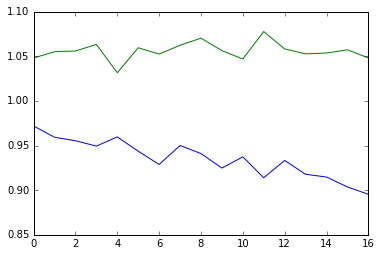

In [87]:
%matplotlib inline

#print np.mean(savings)
plt.plot(output)
plt.plot(socialcost)